# Import Libraries 

In [178]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score ,mean_squared_error 

# Load Data

In [179]:
df = pd.read_csv('insurance.csv')

# EDA (Exploratory Data Analysis)

In [180]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [182]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [183]:
df.shape

(1338, 7)

### check missing value 

In [184]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [185]:
df.duplicated().sum()

np.int64(1)

### drop one duplicated row 

In [186]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

np.int64(0)

### Range of ages

In [187]:
largest = df.nlargest(1, 'age')
smallest = df.nsmallest(1,'age')
print(f'Oldest :{largest['age']} \n youngest {smallest['age']}')

Oldest :62    64
Name: age, dtype: int64 
 youngest 1    18
Name: age, dtype: int64


### Check outliers 

{'whiskers': [<matplotlib.lines.Line2D at 0x21b0da5d950>,
 'caps': [<matplotlib.lines.Line2D at 0x21b0da5dbd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x21b0da5d810>],
 'medians': [<matplotlib.lines.Line2D at 0x21b0da5de50>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b0da5df90>],
 'means': []}

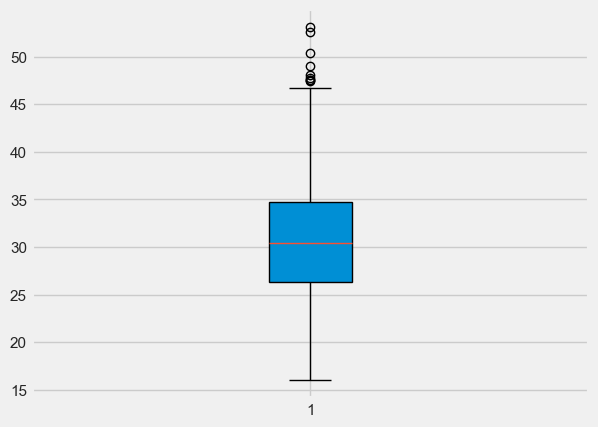

In [188]:
plt.boxplot(df['bmi'],patch_artist=True )

## Remove outliers 

In [189]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1  
    lower_bound = (Q1 - 1.5 * IQR)
    upper_bound = (Q3 + 1.5 * IQR)
    filter = (data[column] <= upper_bound) & (data[column] >= lower_bound)
    df = data[filter]
    return df

In [190]:
df = remove_outliers(df , 'bmi')
df.shape[0]

1328

## Encoding 

In [203]:
df['smoker'].replace('no',0 ,inplace=True)
df['smoker'].replace('yes',1,inplace=True)

In [204]:
df['sex'].replace('female',0 ,inplace=True)
df['sex'].replace('male',1,inplace=True)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## Correlation Heatmap

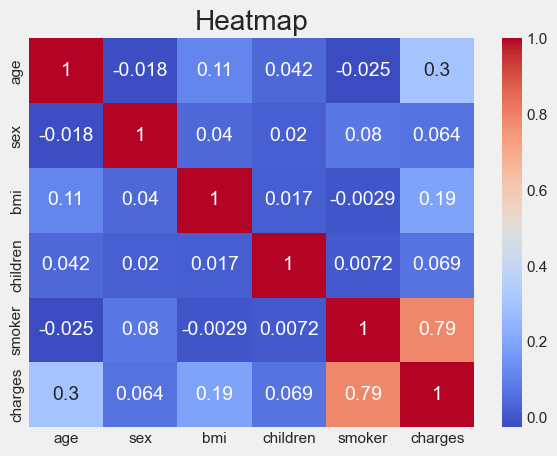

In [193]:
numerical_data = df.select_dtypes(include=['int64','float64'])

corr = numerical_data.corr()
sns.heatmap(corr , annot=True ,cmap='coolwarm')
plt.title('Heatmap')
plt.show()

## Feature Selection

In [194]:
X = df[['age', 'smoker', 'bmi','children','sex']]
Y = df['charges']

In [195]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=10)

## Train the Model 

In [196]:
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [197]:
model = LinearRegression()
model.fit(X_train , Y_train)

LinearRegression()

In [198]:
Y_pred = model.predict(X_test)

## check overfitting

In [199]:
Y_train_Predict = model.predict(X_train)
round(r2_score(Y_train,Y_train_Predict),2)

0.84

## Evaluate The model 

In [200]:
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(Y_test, Y_pred)

print(f'MSE = {round(MSE,2)} \n MAE = {round(MAE,2)} \n RMSE = {round(RMSE,2)}')

MSE = 23351364.2 
 MAE = 2882.13 
 RMSE = 4832.32


In [201]:
Accuracy = round(r2_score(Y_test, Y_pred)*100)
print(f'Model Accuracy = {Accuracy}%')

Model Accuracy = 85%


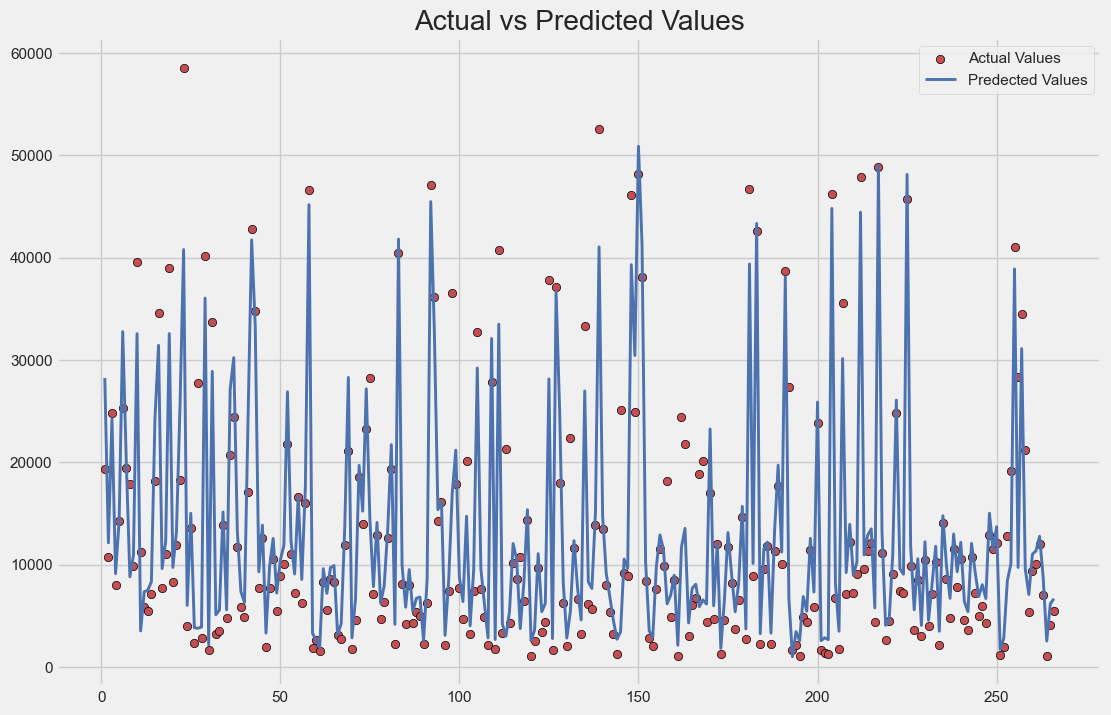

In [202]:
n = len(Y_test)
x_axis = range(1,n+1)
plt.figure(figsize=(12,8))
plt.title("Actual vs Predicted Values")
plt.scatter(x=x_axis,y=Y_test ,marker='o',edgecolors='black' ,c='r',label ='Actual Values')
plt.plot(x_axis , Y_pred , color= 'b',linewidth =2.1, label = 'Predected Values')
plt.legend()
plt.show()